# Temporal patterns

- To start off easily, let's count the number of crimes per year:
    - What is the year with most crimes?
    - What is the year with the fewest crimes?.
- Create a barplot of crimes-per-year (years on the x-axis, crime-counts on the y-axis).
- Finally, Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called *focus crimes*. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Ensure Python can find clean_crime_data.py (go up one level to Assignment-1/)
sys.path.append("../Assignment-1/Clean-Crime_Data")  # ✅ Updated path

from clean_crime_data import clean_crime_data  # Import the function

# Load the cleaned dataset (go up one level to Assignment-1/Data/)
file_path = "../Assignment-1/Data/SF_Crime_Data_Cleaned.csv"  # ✅ Updated path
df = pd.read_csv(file_path, parse_dates=["Incident Date"])

# Clean and filter data using the function
df_focus = clean_crime_data(df)

# Convert "Incident Time" to extract hours
df_focus["Incident Time"] = pd.to_datetime(df_focus["Incident Time"], format="%H:%M", errors="coerce").dt.hour

# Now df_focus is ready for analysis!
print("Unique Crime Categories in df_focus:", df_focus["Incident Category"].unique())  # Check cleaned categories
df_focus.head()
# Save the cleaned df_focus to CSV clearly in the Assignment-1/Data folder
df_focus.to_csv("../Assignment-1/Data/SF_Crime_Data_Focus_Cleaned.csv", index=False)
print("✅ Cleaned focus-crime dataset saved successfully!")





Unique Crime Categories in df_focus: ['ROBBERY' 'VEHICLE THEFT' 'ASSAULT' 'TRESPASS' 'BURGLARY' 'LARCENY/THEFT'
 'DRUG/NARCOTIC' 'VANDALISM' 'WEAPON LAWS' 'DISORDERLY CONDUCT'
 'PROSTITUTION' 'DRUNKENNESS' 'DRIVING UNDER THE INFLUENCE'
 'STOLEN PROPERTY']
✅ Cleaned focus-crime dataset saved successfully!


## Year with the most and fewest crime 

In [7]:
import pandas as pd

# Define current year for partial data
current_year = 2025

# Count crimes per year clearly
crimes_per_year = df_focus["Incident Date"].dt.year.value_counts().sort_index()

# Crimes in incomplete year 2025
crimes_2025 = crimes_per_year.get(current_year, 0)

# Year with most crimes (excluding incomplete 2025)
year_most_crimes = crimes_per_year[crimes_per_year.index < current_year].idxmax()
num_most_crimes = crimes_per_year[year_most_crimes]

# Year with fewest crimes (excluding incomplete 2025)
year_fewest_crimes = crimes_per_year[crimes_per_year.index < current_year].idxmin()
num_fewest_crimes = crimes_per_year[year_fewest_crimes]

# Print results clearly
print(f"📅 Year with the most crimes: {year_most_crimes} ({num_most_crimes} crimes)")
print(f"📅 Year with the fewest crimes: {year_fewest_crimes} ({num_fewest_crimes} crimes)")

# Crimes in 2025 separately
crimes_2025 = crimes_per_year.get(current_year, 0)
print(f"📅 Crimes in the incomplete year {current_year}: {crimes_2025}")


📅 Year with the most crimes: 2017 (93149 crimes)
📅 Year with the fewest crimes: 2024 (61322 crimes)
📅 Crimes in the incomplete year 2025: 5994


## Bar plot for crime per year 

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_52113/3702355666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values, palette="Blues_d")


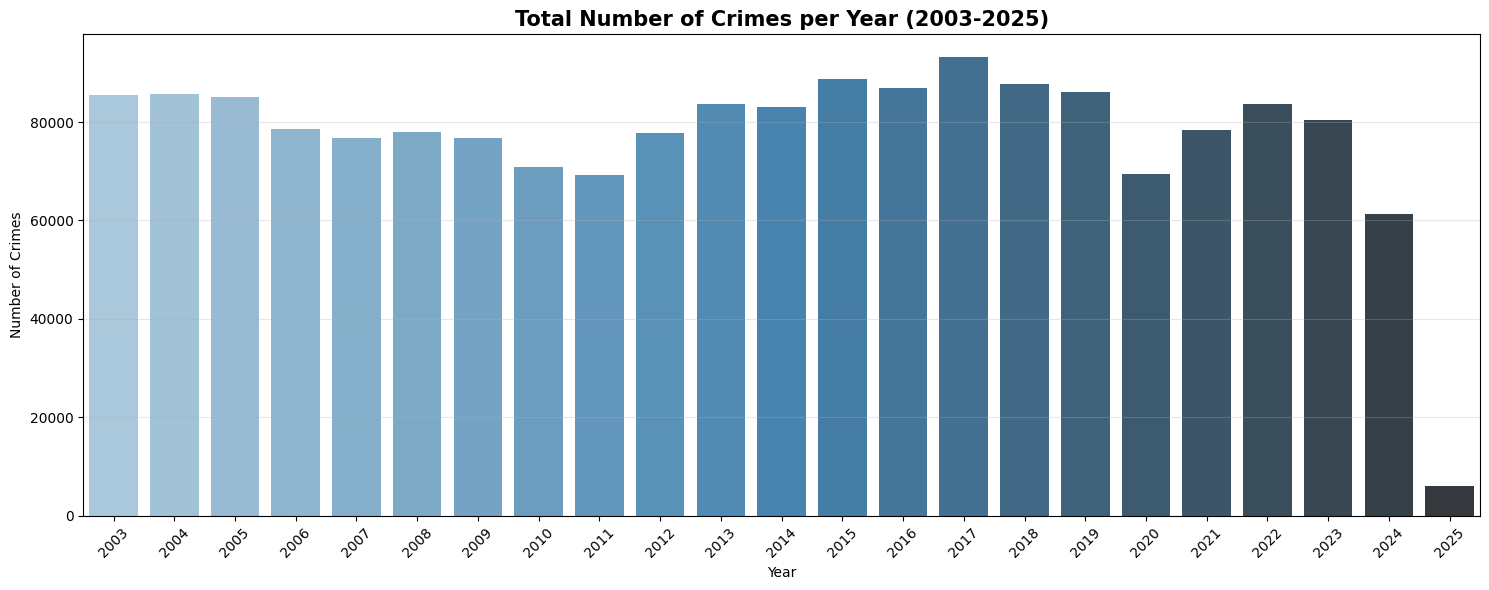

In [11]:
plt.figure(figsize=(15, 6))
sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values, palette="Blues_d")

plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Total Number of Crimes per Year (2003-2025)", fontsize=15, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


We can see that crime frequency peaked in 2017, with 93,149 recorded incidents, marking it as the year with the highest crime activity within the period studied. Crime levels notably declined afterward, reaching their lowest point in 2024, with 61,322 reported incidents. Data for the current year (2025) is still incomplete, thus it's treated separately with ongoing data collection.

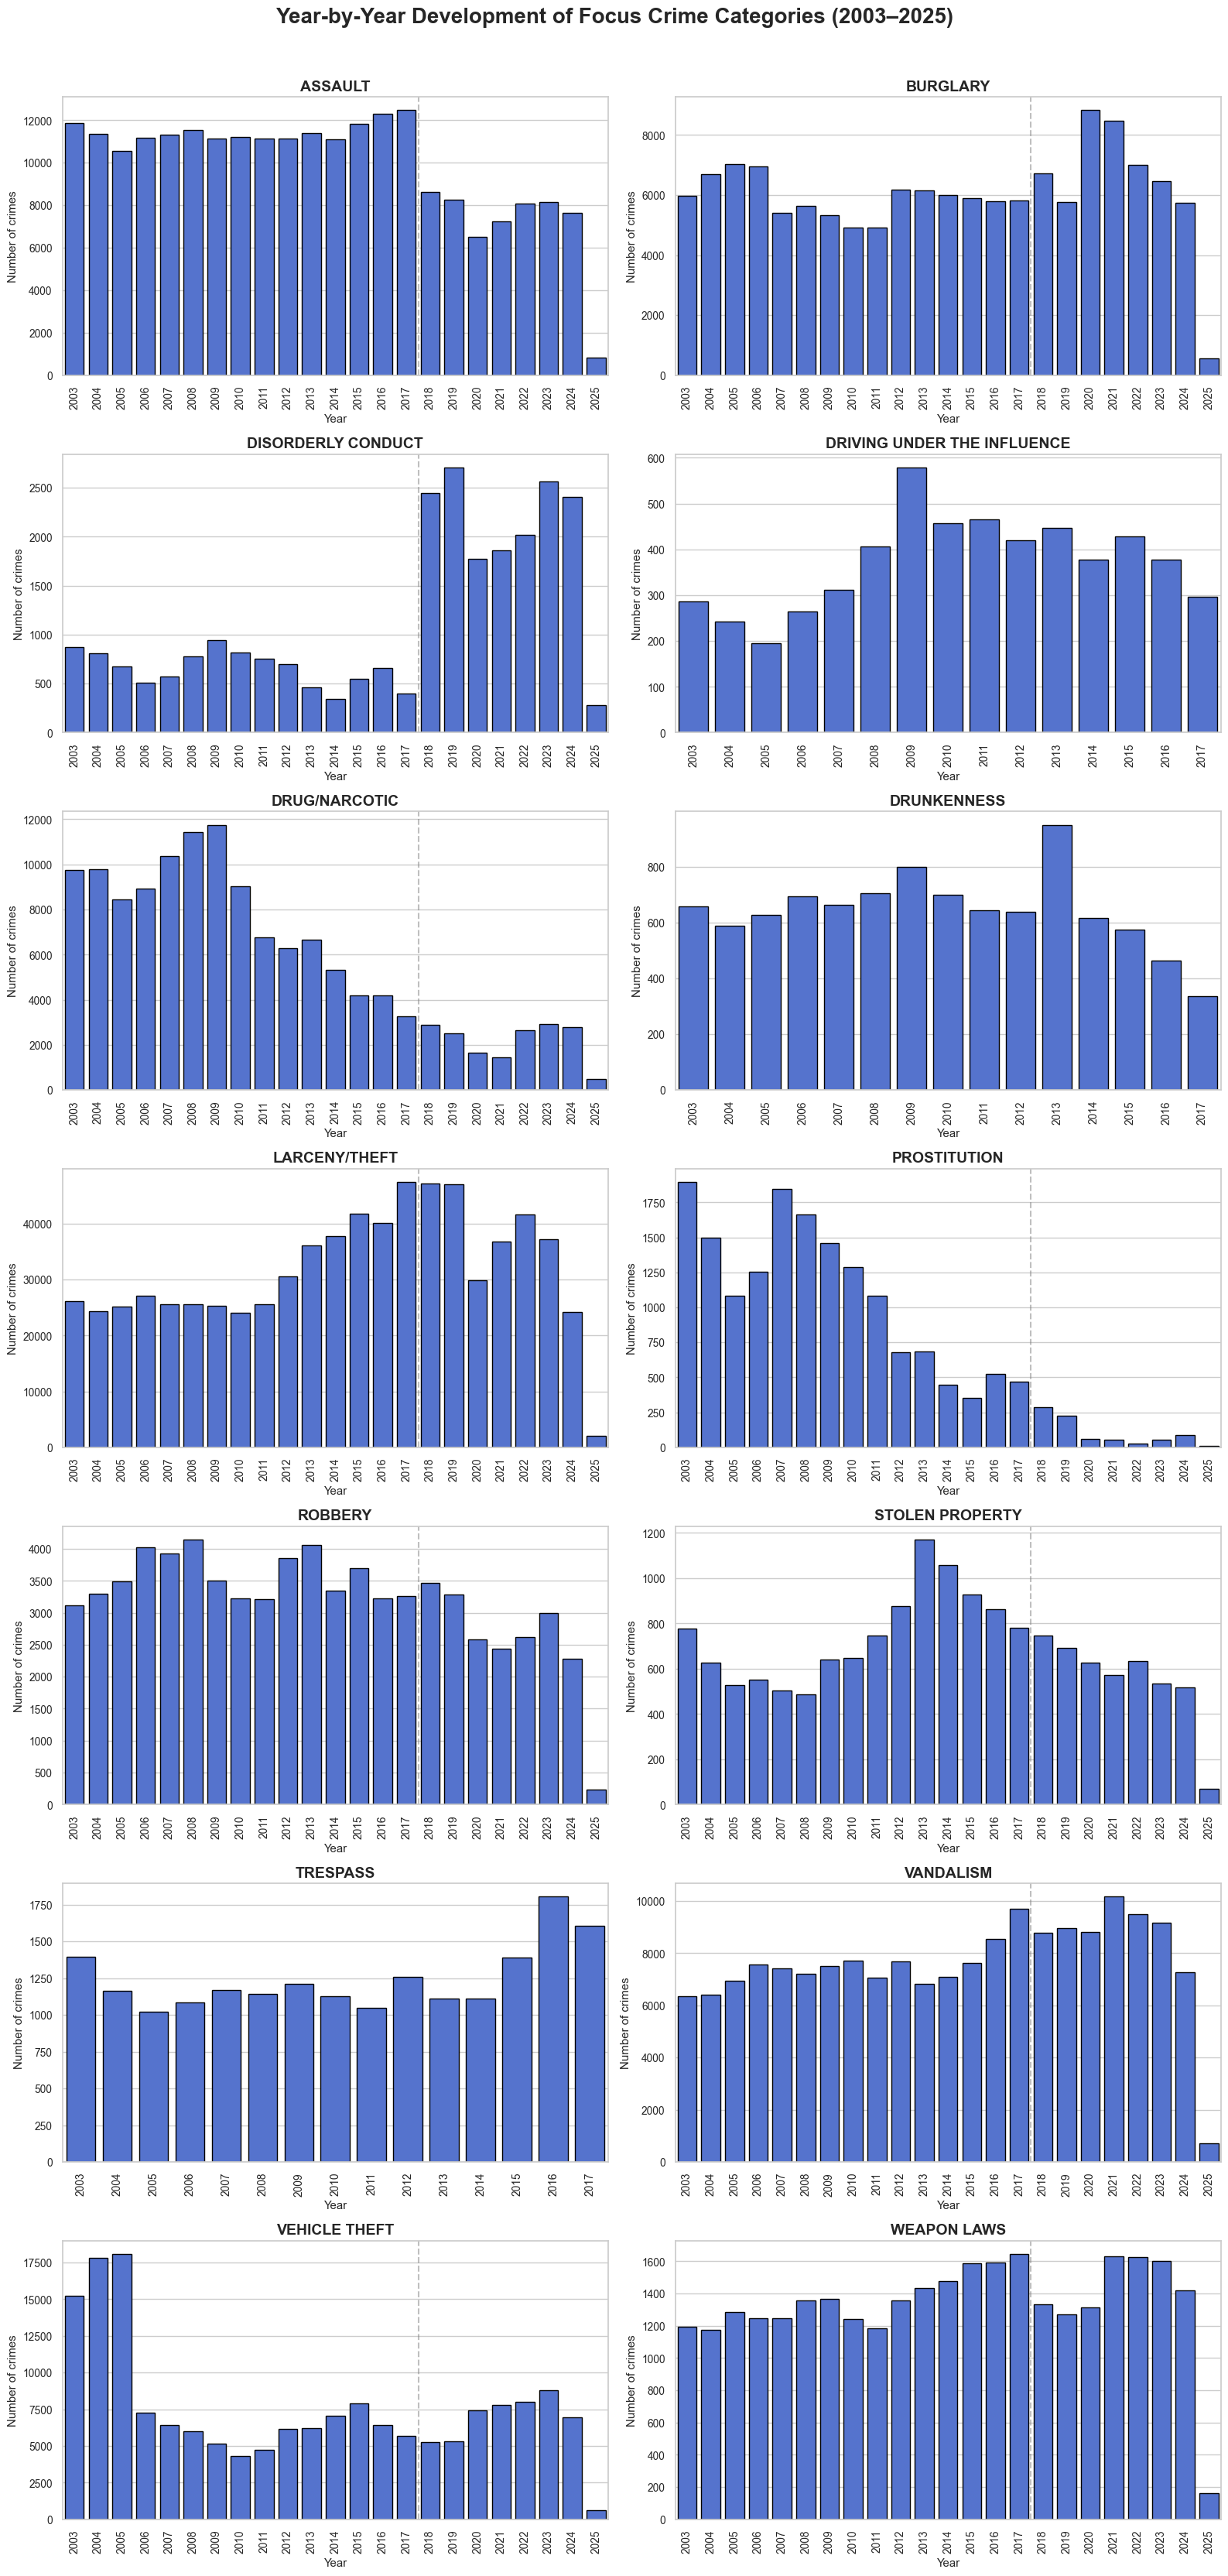

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define focus crime categories
focuscrimes = [
    "WEAPON LAWS", "PROSTITUTION", "ROBBERY", "BURGLARY", "ASSAULT", 
    "DRUNKENNESS", "DRUG/NARCOTIC", "TRESPASS", "LARCENY/THEFT", 
    "VANDALISM", "VEHICLE THEFT", "STOLEN PROPERTY", "DISORDERLY CONDUCT", 
    "DRIVING UNDER THE INFLUENCE"
]

# Filter the dataframe to include only focus crimes
df_focus = df_focus[df_focus["Incident Category"].isin(focuscrimes)]

# Extract year
df_focus["Year"] = df_focus["Incident Date"].dt.year

# Count crimes per year per category
crime_counts = df_focus.groupby(["Incident Category", "Year"]).size().reset_index(name="Count")

# Set up plotting environment
sns.set_style("whitegrid")
num_crimes = len(focuscrimes)
fig, axes = plt.subplots(nrows=num_crimes//2 + num_crimes % 2, ncols=2, figsize=(16, num_crimes*2.5))
axes = axes.flatten()

# Plot each crime category clearly and separately
for i, crime in enumerate(sorted(focuscrimes)):
    crime_data = crime_counts[crime_counts["Incident Category"] == crime]
    sns.barplot(ax=axes[i], x="Year", y="Count", data=crime_data, color="royalblue", edgecolor="black")
    axes[i].set_title(crime, fontsize=14, fontweight="bold")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of crimes")
    axes[i].tick_params(axis="x", rotation=90)

    # Add vertical dashed line marking dataset boundary at 2018
    if 2018 in crime_data["Year"].values:
        idx_2018 = crime_data[crime_data["Year"] == 2018].index[0] - crime_data.index[0] - 0.5
        axes[i].axvline(idx_2018, linestyle="--", color="gray", alpha=0.5)

# Remove empty subplots if total plots are odd number
if num_crimes % 2 != 0:
    fig.delaxes(axes[-1])

plt.suptitle("Year-by-Year Development of Focus Crime Categories (2003–2025)", fontsize=20, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
